1. Describe the portrait of customers and provide insights into their behavior.

In [1]:
import pandas as pd
import os
import sqldf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("D:\Files\Data Gen 8\Predictive Analytics\Homework\Class 3 _ Pizzahut - RFM\De bai\Round 2 - Data set.xlsx",sheet_name='Purchasing data')

In [3]:
df

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,33066,33066,Take Away,STORE,2021-10-16 00:00:00+00:00,185271,2174083,Unknown,No,Southern Provinces
1,983828,983828,Delivery,STORE,2022-12-10 00:00:00+00:00,262489,2174075,Unknown,No,Southern Provinces
2,817983,817983,Take Away,WEBSITE,2022-09-13 00:00:00+00:00,330512,2174072,Male,No,Southern Provinces
3,876194,876194,Take Away,WEBSITE,2022-10-13 00:00:00+00:00,285143,2174072,Male,No,Ho Chi Minh City
4,974818,974818,Delivery,APP,2022-12-04 00:00:00+00:00,337963,2174072,Male,No,Ho Chi Minh City
...,...,...,...,...,...,...,...,...,...,...
1048570,290337,290337,Take Away,STORE,2022-01-29 00:00:00+00:00,287492,18,Unknown,No,Hanoi
1048571,822087,822087,Delivery,WEBSITE,2022-09-16 00:00:00+00:00,286558,16,Unknown,No,Nothern Provinces
1048572,675515,675515,Delivery,CALL CENTER,2022-07-11 00:00:00+00:00,1098496,8,Unknown,No,Hanoi
1048573,383630,383630,Delivery,STORE,2022-03-07 00:00:00+00:00,105503,1,Unknown,No,Nothern Provinces


a. Who are the people buying products?

In [4]:
count_by_gender = df.groupby('CustomerGender')['CustomerID'].nunique()

In [5]:
count_by_gender

CustomerGender
Female      55346
Male       104087
Unknown    424209
Name: CustomerID, dtype: int64

b. Which location do they live in?

In [6]:
Location= df.groupby('Province')['CustomerID'].nunique()

In [7]:
Location

Province
Hanoi                 174189
Ho Chi Minh City      167449
Nothern Provinces     104453
Southern Provinces    143999
Name: CustomerID, dtype: int64

c. Which channel are they purchasing from?


In [8]:
Purchase_Channel= df.groupby('Channel')['CustomerID'].nunique()

In [9]:
Purchase_Channel

Channel
Delivery     279929
Dine In       13663
Take Away    350021
Name: CustomerID, dtype: int64

2. Using the RFM model, segment customers into different groups.

In [10]:
df

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,33066,33066,Take Away,STORE,2021-10-16 00:00:00+00:00,185271,2174083,Unknown,No,Southern Provinces
1,983828,983828,Delivery,STORE,2022-12-10 00:00:00+00:00,262489,2174075,Unknown,No,Southern Provinces
2,817983,817983,Take Away,WEBSITE,2022-09-13 00:00:00+00:00,330512,2174072,Male,No,Southern Provinces
3,876194,876194,Take Away,WEBSITE,2022-10-13 00:00:00+00:00,285143,2174072,Male,No,Ho Chi Minh City
4,974818,974818,Delivery,APP,2022-12-04 00:00:00+00:00,337963,2174072,Male,No,Ho Chi Minh City
...,...,...,...,...,...,...,...,...,...,...
1048570,290337,290337,Take Away,STORE,2022-01-29 00:00:00+00:00,287492,18,Unknown,No,Hanoi
1048571,822087,822087,Delivery,WEBSITE,2022-09-16 00:00:00+00:00,286558,16,Unknown,No,Nothern Provinces
1048572,675515,675515,Delivery,CALL CENTER,2022-07-11 00:00:00+00:00,1098496,8,Unknown,No,Hanoi
1048573,383630,383630,Delivery,STORE,2022-03-07 00:00:00+00:00,105503,1,Unknown,No,Nothern Provinces


In [11]:
df.dtypes

Unnamed: 0          int64
BillID              int64
Channel            object
OrderFrom          object
TransactionDate    object
SalesAmount         int64
CustomerID          int64
CustomerGender     object
VoucherStatus      object
Province           object
dtype: object

Calculate Recency(R)

In [12]:
import datetime

In [13]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Calculate Recency (days since the most recent transaction)
current_date = max(df['TransactionDate']) + datetime.timedelta(days=1)
recency_df = df.groupby(['CustomerID']).agg(
    {'TransactionDate': lambda x: (current_date - x.max()).days}
)

# Reset index to make 'CustomerID' a separate column
recency_df = recency_df.reset_index()

# Rename the column
recency_df.rename(columns={'TransactionDate': 'Recency'}, inplace=True)

print(recency_df)


        CustomerID  Recency
0                0      382
1                1      309
2                8      183
3               16      116
4               18      346
...            ...      ...
583637     2174065      255
583638     2174066        7
583639     2174072       37
583640     2174075       31
583641     2174083      451

[583642 rows x 2 columns]


Calculate Frequency(F)

In [14]:
# Tính Frequency (số lần giao dịch) cho mỗi khách hàng
frequency_df = df.groupby('CustomerID')['BillID'].count().reset_index()
frequency_df.rename(columns={'BillID': 'Frequency'}, inplace=True)
print(frequency_df)

        CustomerID  Frequency
0                0          1
1                1          1
2                8          1
3               16          1
4               18          1
...            ...        ...
583637     2174065          1
583638     2174066          1
583639     2174072          3
583640     2174075          1
583641     2174083          1

[583642 rows x 2 columns]


Calculate Monetary(M)

In [15]:
# Tính Monetary (tổng số tiền đã chi tiêu) cho mỗi khách hàng
monetary_df = df.groupby('CustomerID')['SalesAmount'].sum().reset_index()
monetary_df.rename(columns={'SalesAmount': 'Monetary'}, inplace=True)

In [16]:
# Kết hợp các giá trị R, F và M để tính điểm RFM
rfm_df = pd.merge(recency_df, frequency_df, on='CustomerID')
rfm_df = pd.merge(rfm_df, monetary_df, on='CustomerID')

In [17]:
print(rfm_df)

        CustomerID  Recency  Frequency  Monetary
0                0      382          1    411663
1                1      309          1    105503
2                8      183          1   1098496
3               16      116          1    286558
4               18      346          1    287492
...            ...      ...        ...       ...
583637     2174065      255          1    138943
583638     2174066        7          1    143685
583639     2174072       37          3    953618
583640     2174075       31          1    262489
583641     2174083      451          1    185271

[583642 rows x 4 columns]


In [18]:
r_labels = range(4, 0,-1)
r_quartiles = pd.qcut(rfm_df['Recency'], 4, labels = r_labels)
rfm_df = rfm_df.assign(R = r_quartiles.values)
print(rfm_df)

        CustomerID  Recency  Frequency  Monetary  R
0                0      382          1    411663  1
1                1      309          1    105503  2
2                8      183          1   1098496  3
3               16      116          1    286558  3
4               18      346          1    287492  1
...            ...      ...        ...       ... ..
583637     2174065      255          1    138943  2
583638     2174066        7          1    143685  4
583639     2174072       37          3    953618  4
583640     2174075       31          1    262489  4
583641     2174083      451          1    185271  1

[583642 rows x 5 columns]


In [19]:
f_labels = range(1,5)
m_labels = range(1,5)

# Add a small jitter to the data
rfm_df['Frequency'] += np.random.rand(len(rfm_df)) * 1e-6
rfm_df['Monetary'] += np.random.rand(len(rfm_df)) * 1e-6

# Calculate quartiles
f_quartiles = pd.qcut(rfm_df['Frequency'], 4, labels=f_labels, duplicates='drop')
m_quartiles = pd.qcut(rfm_df['Monetary'], 4, labels=m_labels, duplicates='drop')

# Assign quartiles to dataframe
rfm_df = rfm_df.assign(F=f_quartiles.values)
rfm_df = rfm_df.assign(M=m_quartiles.values)

print(rfm_df)


        CustomerID  Recency  Frequency      Monetary  R  F  M
0                0      382   1.000001  4.116630e+05  1  2  3
1                1      309   1.000000  1.055030e+05  2  1  1
2                8      183   1.000000  1.098496e+06  3  1  4
3               16      116   1.000001  2.865580e+05  3  3  2
4               18      346   1.000000  2.874920e+05  1  1  2
...            ...      ...        ...           ... .. .. ..
583637     2174065      255   1.000001  1.389430e+05  2  2  1
583638     2174066        7   1.000001  1.436850e+05  4  2  1
583639     2174072       37   3.000000  9.536180e+05  4  4  4
583640     2174075       31   1.000001  2.624890e+05  4  3  2
583641     2174083      451   1.000001  1.852710e+05  1  2  1

[583642 rows x 7 columns]


In [21]:
# Define function to join R, F, and M values
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

# Apply function to create RFM_Segment column
rfm_df['RFM_Segment'] = rfm_df.apply(join_rfm, axis=1)

# Print DataFrame
print(rfm_df)


        CustomerID  Recency  Frequency      Monetary  R  F  M RFM_Segment
0                0      382   1.000001  4.116630e+05  1  2  3         123
1                1      309   1.000000  1.055030e+05  2  1  1         211
2                8      183   1.000000  1.098496e+06  3  1  4         314
3               16      116   1.000001  2.865580e+05  3  3  2         332
4               18      346   1.000000  2.874920e+05  1  1  2         112
...            ...      ...        ...           ... .. .. ..         ...
583637     2174065      255   1.000001  1.389430e+05  2  2  1         221
583638     2174066        7   1.000001  1.436850e+05  4  2  1         421
583639     2174072       37   3.000000  9.536180e+05  4  4  4         444
583640     2174075       31   1.000001  2.624890e+05  4  3  2         432
583641     2174083      451   1.000001  1.852710e+05  1  2  1         121

[583642 rows x 8 columns]


In [22]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment
0,0,382,1.000001,4.116630e+05,1,2,3,123
1,1,309,1.000000,1.055030e+05,2,1,1,211
2,8,183,1.000000,1.098496e+06,3,1,4,314
3,16,116,1.000001,2.865580e+05,3,3,2,332
4,18,346,1.000000,2.874920e+05,1,1,2,112
...,...,...,...,...,...,...,...,...
583637,2174065,255,1.000001,1.389430e+05,2,2,1,221
583638,2174066,7,1.000001,1.436850e+05,4,2,1,421
583639,2174072,37,3.000000,9.536180e+05,4,4,4,444
583640,2174075,31,1.000001,2.624890e+05,4,3,2,432


In [23]:
rfm_df['Recency'].describe()

count    583642.000000
mean        220.832868
std         135.498886
min           1.000000
25%         102.000000
50%         218.000000
75%         337.000000
max         466.000000
Name: Recency, dtype: float64

In [24]:
rfm_df['Frequency'].describe()

count    583642.000000
mean          1.796607
std           2.269033
min           1.000000
25%           1.000000
50%           1.000001
75%           2.000000
max         238.000000
Name: Frequency, dtype: float64

In [25]:
rfm_df['Monetary'].describe()

count    5.836420e+05
mean     5.477354e+05
std      8.803920e+05
min      7.148000e+03
25%      2.012890e+05
50%      3.118160e+05
75%      5.674813e+05
max      1.337745e+08
Name: Monetary, dtype: float64

In [26]:
# Save DataFrame to a CSV file in a specific location
rfm_df.to_csv('D:\Files\Data Gen 8\Predictive Analytics\My projects\output.csv', index=False)

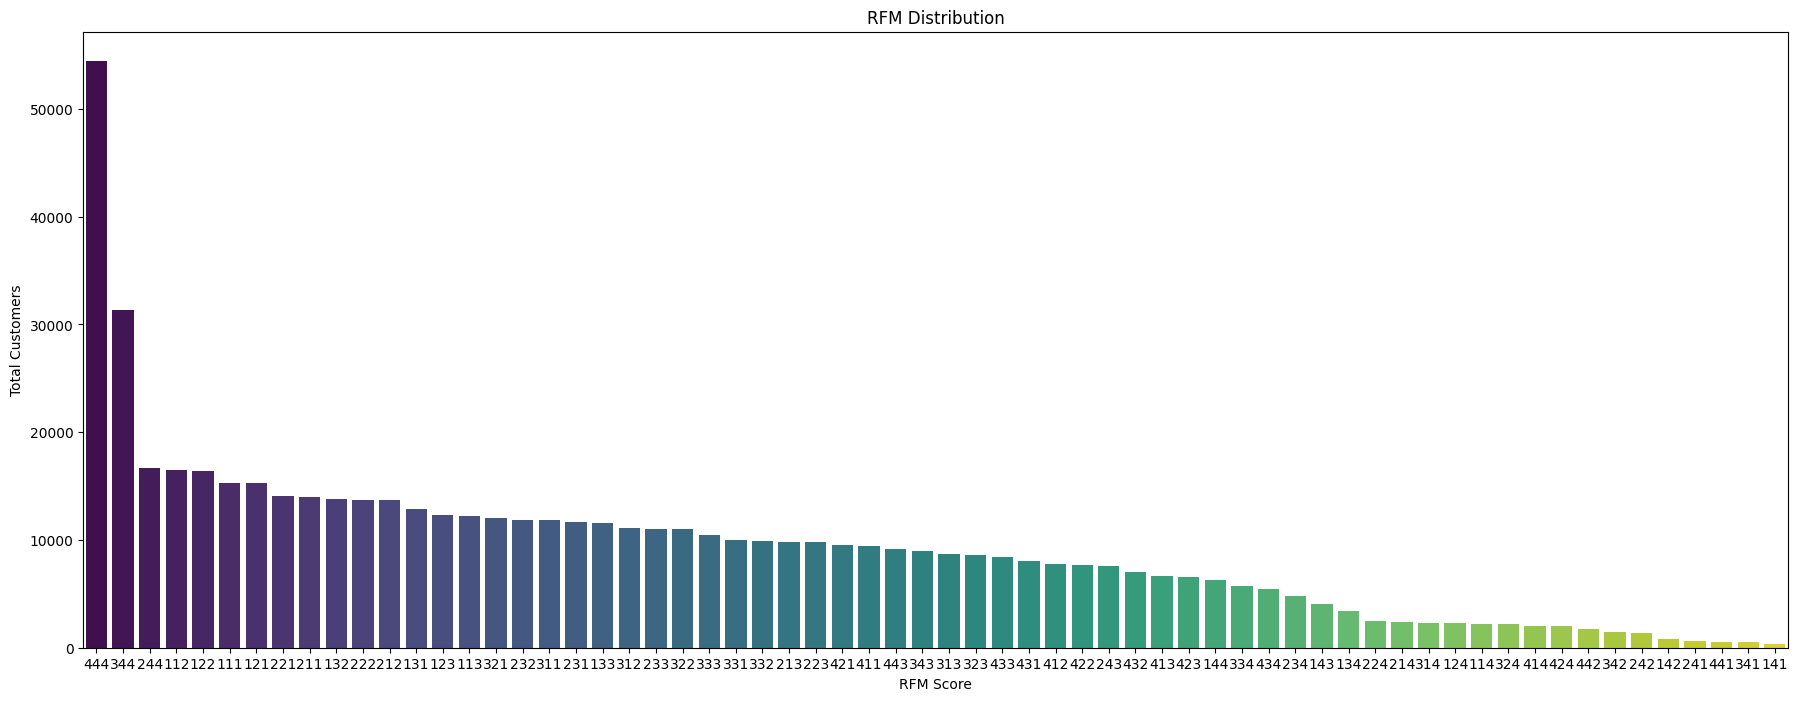

In [27]:
# Calculate the count of customers for each RFM segment
rfm_segment_counts = rfm_df['RFM_Segment'].value_counts()

# Sort the segments based on the count
sorted_segments = rfm_segment_counts.sort_values(ascending=False).index

plt.figure(figsize=(22, 8))
sns.countplot(x='RFM_Segment', data=rfm_df, order=sorted_segments, palette='viridis')
plt.title('RFM Distribution')
plt.xlabel('RFM Score')
plt.ylabel('Total Customers')
plt.show()


In [86]:
# Select columns for clustering
columns_for_clustering = ["Recency", "Frequency", "Monetary"]

# Create new DataFrame with clustering variables
df_features = rfm_df[columns_for_clustering]

# Print a summary of descriptive statistics
df_features.describe()


,Recency,Frequency,Monetary
count,583642.000000,583642.000000,5.836420e+05
mean,220.832868,1.796607,5.477354e+05
std,135.498886,2.269033,8.803920e+05
min,1.000000,1.000000,7.148000e+03
25%,102.000000,1.000000,2.012890e+05
50%,218.000000,1.000001,3.118160e+05
75%,337.000000,2.000000,5.674813e+05
max,466.000000,238.000000,1.337745e+08


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


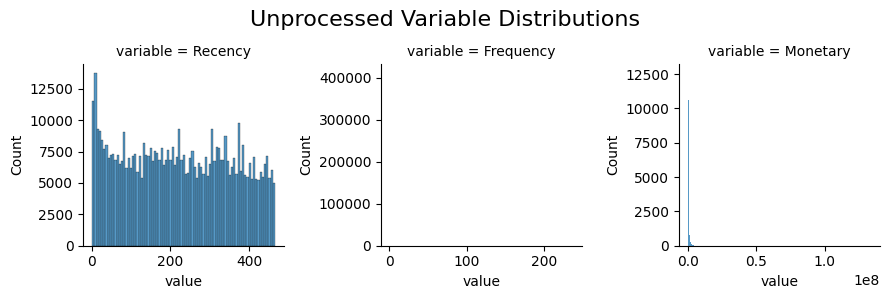

In [91]:
# Plot the distributions of the selected variables
g = sns.FacetGrid(
    df_features.melt(),  # Reformat the DataFrame for plotting purposes
    col="variable",  # Split on the 'variable' column created by reformating
    sharey=False,  # Turn off shared y-axis
    sharex=False,  # Turn off shared x-axis
)
# Apply a histogram to the facet grid
g.map(sns.histplot, "value")
# Adjust the top of the plots to make room for the title
g.fig.subplots_adjust(top=0.8)
# Create a title
g.fig.suptitle("Unprocessed Variable Distributions", fontsize=16)
plt.show()

In [57]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.0 MB/s eta 0:00:06
   ---------------------------------------- 0.1/10.6 MB 1.8 MB/s eta 0:00:06
    --------------------------------------- 0.2/10.6 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.6 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/10.6 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/10.6 MB 4.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/10.6 MB 4.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/10.6 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/10.6 MB 5.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/10.6 MB 5.5 MB/s eta 0:00:02
   ---------- -----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.3.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


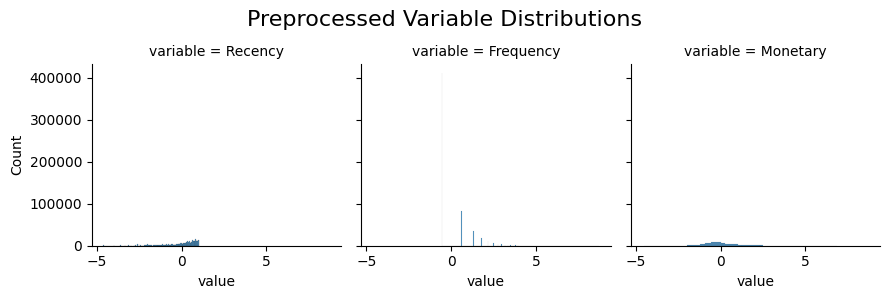

In [59]:
# Perform a log transformation of the data to unskew the data
df_log = np.log(df_features)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(df_log)

# Scale and center the data
df_normalized = scaler.transform(df_log)

# Create a pandas DataFrame of the processed data
df_processed = pd.DataFrame(
    data=df_normalized, index=df_features.index, columns=df_features.columns
)

# Plot the distributions of the selected variables
g = sns.FacetGrid(df_processed.melt(), col="variable")
g.map(sns.histplot, "value")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Preprocessed Variable Distributions", fontsize=16)
plt.show()

In [97]:
df_processed.describe()

,Recency,Frequency,Monetary
count,5.836420e+05,5.836420e+05,5.836420e+05
mean,1.504243e-15,-2.514235e-16,-5.558270e-15
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-4.632518e+00,-5.580494e-01,-4.512586e+00
25%,-3.787146e-01,-5.580488e-01,-6.420266e-01
50%,3.198534e-01,-5.580482e-01,-1.345132e-01
75%,7.204839e-01,6.194753e-01,5.598344e-01
max,1.018576e+00,8.738291e+00,6.894253e+00


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


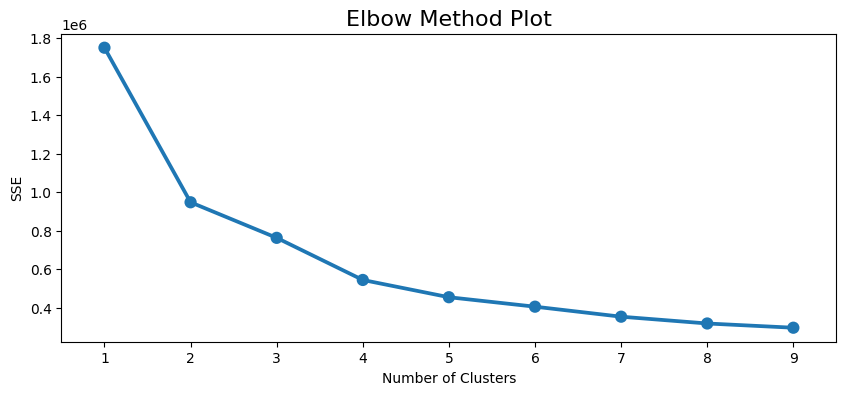

In [60]:
# Set the maximum number of clusters to plot
max_clusters = 10

# Initialize empty dictionary to store sum of squared errors
sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, max_clusters):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit KMeans on the normalized dataset
    kmeans.fit(df_processed)
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

# Initialize a figure of set size
plt.figure(figsize=(10, 4))

# Create an elbow plot of SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

# Add labels to the plot
plt.title("Elbow Method Plot", fontsize=16)  # Add a title to the plot
plt.xlabel("Number of Clusters")  # Add x-axis label
plt.ylabel("SSE")  # Add y-axis label

# Show the plot
plt.show()

In [81]:
# Choose number of clusters
k = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(df_processed)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a new DataFrame by adding a new cluster column to the original data
df_clustered = rfm_df.assign(Cluster=cluster_labels)

# Preview the clustered DataFrame
df_clustered


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,Cluster
0,0,382,1.000001,4.116630e+05,1,2,3,123,0
1,1,309,1.000000,1.055030e+05,2,1,1,211,0
2,8,183,1.000000,1.098496e+06,3,1,4,314,1
3,16,116,1.000001,2.865580e+05,3,3,2,332,0
4,18,346,1.000000,2.874920e+05,1,1,2,112,0
...,...,...,...,...,...,...,...,...,...
583637,2174065,255,1.000001,1.389430e+05,2,2,1,221,0
583638,2174066,7,1.000001,1.436850e+05,4,2,1,421,0
583639,2174072,37,3.000000,9.536180e+05,4,4,4,444,2
583640,2174075,31,1.000001,2.624890e+05,4,3,2,432,0


In [82]:
df_clustered.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(2)


,Recency,Frequency,Monetary
Cluster,,,
0,253.46,1.01,259026.39
1,199.91,2.39,829769.85
2,42.09,5.89,1924197.45


In [84]:
# Group the data by cluster and calculate the total number of rows per group
df_sizes = df_clustered.groupby(["Cluster"], as_index=False).size()

# Inspect the row counts
df_sizes

,Cluster,size
0,0,400836
1,1,124175
2,2,58631


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


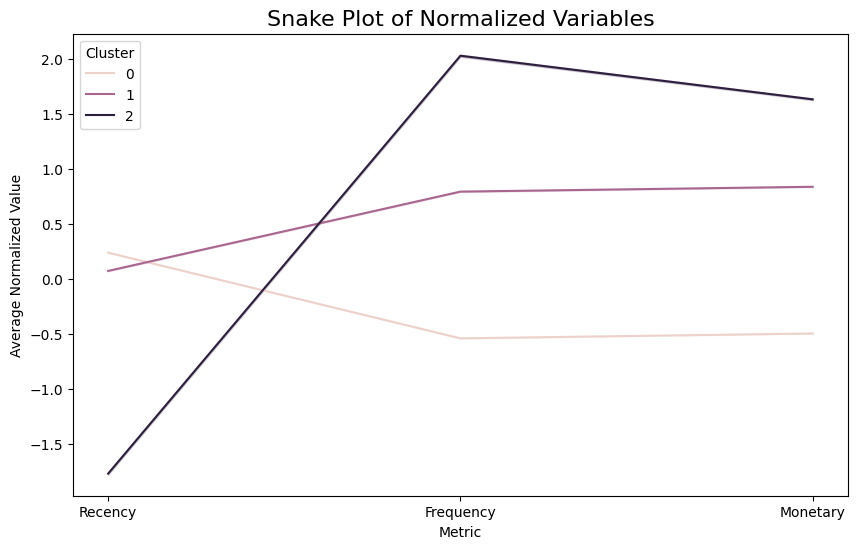

In [85]:
# Assign cluster labels to processed DataFrame
df_processed_clustered = df_processed.assign(Cluster=cluster_labels)

# Melt the normalized DataFrame and reset the index
df_processed_melt = pd.melt(
    df_processed_clustered.reset_index(),
    # Assign the cluster labelss as the ID
    id_vars=['Cluster'],
    # Assign clustering variables as values
    value_vars=df_features.columns,
    # Name the variable and value
    var_name="Metric",
    value_name="Value",
)

# Change the figure size
plt.figure(figsize=(10, 6))

# Add label and titles to the plot
plt.title('Snake Plot of Normalized Variables', fontsize=16)
plt.xlabel('Metric')
plt.ylabel('Average Normalized Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=df_processed_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

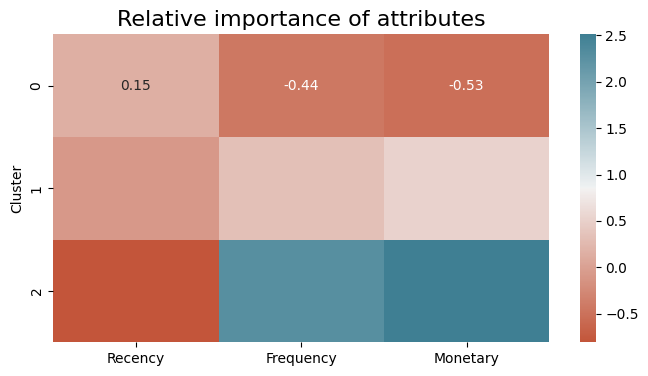

In [98]:
# Calculate average RFM values for each cluster
cluster_avg = df_clustered.groupby(["Cluster"])[columns_for_clustering].mean()

# Calculate average RFM values for the total customer population
population_avg = rfm_df[columns_for_clustering].mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Change the figure size
plt.figure(figsize=(8, 4))

# Add the plot title
plt.title("Relative importance of attributes", fontsize=16)

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt=".2f", cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()